<a href="https://colab.research.google.com/github/debcloud-ML-and-DS/advancedHousePricePrediction/blob/master/BinaryImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Establishing a connection with google drive

# Problem Definition:
A machine learning model to predict either a food is steak or pizza

# Evaluation:
If we get an accuracy score between 80 and 90% then our model is ready to go into production

# Data:
The dataset can be found with the provided link https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Features:
* 1. Pizza
* 2. Steak

# Make our tools ready

In [122]:
#import libries
import numpy as np
import matplotlib.image as plt_img
import matplotlib.pyplot as plt
import pandas as pd

#import tensorflow libries
import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Other libries
import random
import os

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing our datasets

In [124]:
#Get out data
#Import zipfile
import zipfile

#Get dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    
#Unzip dataset
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref
zip_ref.close()

--2021-04-10 00:57:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 172.217.164.144, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   296MB/s    in 0.4s    

2021-04-10 00:57:00 (296 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



# Lets try to check both the length of our training and test datasets from both classes

In [125]:
#check total number of training dataset(pizza and steak)
train_pizza = len(os.listdir("pizza_steak/train/pizza"))
train_steak = len(os.listdir("pizza_steak/train/steak"))

#check total number of test dataset(pizza and steak)
test_pizza = len(os.listdir("pizza_steak/test/pizza"))
test_steak = len(os.listdir("pizza_steak/test/steak"))

#Display total number of trained datasets
print("Train pizza and steak datasets\n==============================")
print(f"The total number of train pizza dataset is {train_pizza}")
print(f"The total number of train steak dataset is {train_steak}")

#Display total number of test datasets
print("\nTest pizza and steak datasets\n=============================")
print(f"The total number of test pizza dataset is {test_pizza}")
print(f"The total number of test steak dataset is {test_steak}")

Train pizza and steak datasets
The total number of train pizza dataset is 750
The total number of train steak dataset is 750

Test pizza and steak datasets
The total number of test pizza dataset is 250
The total number of test steak dataset is 250


From the above, we can see that both our trainning dataset and test datasets are balanced. Hence we can start training our model using this datasets. Lets continue by creating a helper function to help us visualize our datasets.

In [126]:
#Create a function to visualize our datasets
def view_images(target_folder, target_class):
  #set image path
  image_path = target_folder + target_class

  #set random image path
  rand_image_path = random.sample(os.listdir(image_path), 1)

  #read and visualize image using matplotlib
  img = plt_img.imread(image_path+"/"+rand_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  return img

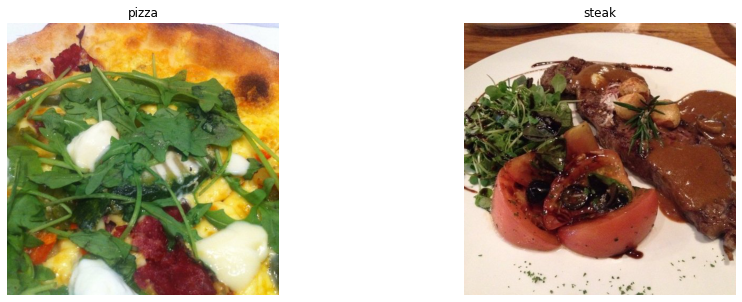

In [127]:
#Display images
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
pizza = view_images("pizza_steak/train/","pizza")

plt.subplot(1,2,2)
steak = view_images("pizza_steak/train/","steak")

Now that he have used our function to randomly select some pizza and steak images, we are going to start building our model by starting with our **BASE LINE MODEL**.

## Data preprocessing

In [128]:
#set seed
tf.random.set_seed(42)

#set data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Set image paths
test_data_path = "pizza_steak/test"
train_data_path = "pizza_steak/train"

#Train datasets
train_data = train_datagen.flow_from_directory(directory=train_data_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              seed=42,
                                              class_mode="binary")

#Test datasets
test_data = test_datagen.flow_from_directory(directory=test_data_path,
                                            batch_size=32,
                                            class_mode="binary",
                                            target_size=(224, 224),
                                            seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


from the above we can see that we have 1500 images belonging to 2 class thats **Pizza and Steak**(train_dataset) and 500 image also belonging to another two class thats also **Pizza and Steak**(test datasets)

In [129]:
images, labels = train_data.next()

#Display lenght of train dataset
images.shape

(32, 224, 224, 3)

From the above we can see that we have been able to convert our image into a different shape thats the first parameter is the **BATCH SIZE** the second and third value is the **IMAGE SHAPE** and the last value is the **COLOR CHANNEL**.

### Lets start building our model (Base Model)
We are going to build our base model with minimum parameters and try to beat this base model by increasing and tweeking the layers, adding **MaxPool2D** and adding many other things to it.
### Base Model

In [130]:
#setup random seed
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          input_shape=(224, 224, 3),
                          activation="relu"),
   #1st hidden layer
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu"),
   #2nd hidden layer
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu"),
   #3rd hidden layer
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu"),
  #4th hidden layer
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  #5th hidden layer
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  #Flatten 5th output layer and pass it to
  #our output layer

  tf.keras.layers.Flatten(),

  #Output layer
  tf.keras.layers.Dense(units=1, activation="sigmoid")
                  
])

#Let's compile our model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Let's fit our model
history = model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6729 - accuracy: 0.5868 - val_loss: 0.5072 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.5050 - accuracy: 0.7595 - val_loss: 0.5772 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4853 - accuracy: 0.7815 - val_loss: 0.3827 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4568 - accuracy: 0.8074 - val_loss: 0.3848 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3092 - accuracy: 0.8750 - val_loss: 0.3790 - val_accuracy: 0.8300



Now we have been able to build our **BASE MODEL** model. Now we are going to create a helper function to help us visualize our loss and accuracy to determine if our model is overfitting or not.

---



In [131]:
#helper function to help us visualize our loss and accuracy
def graph_to_visualize(history):
  """
  this functio will be used to
  visualize both our loss and accuracy
  from both training and test datasets
  """

  # loss values
  train_loss = history.history["loss"]
  test_loss = history.history["val_loss"]

  # accuracy values
  train_accuracy = history.history["accuracy"]
  test_accuracy = history.history["val_accuracy"]

  # epoch
  epoch = range(len(history.history["loss"]))

  """
  Now we are going to start ploting
  our loss results
  """
  plt.figure(figsize=(15, 5))
  plt.subplot(1,2,1)
  plt.plot(epoch, train_loss, label="loss on train dataset")
  plt.plot(epoch, test_loss, label="loss on test dataset")
  plt.xlabel("epochs")
  plt.title("Loss on both train and test dataset")
  plt.legend()

  """
  Now we are going to plot
  our accuracy results
  """
  plt.subplot(1,2,2)
  plt.plot(epoch, train_accuracy, label="accuracy on train dataset")
  plt.plot(epoch, test_accuracy, label="accuracy on test dataset")
  plt.title("Accuracy on both train and test dataset")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

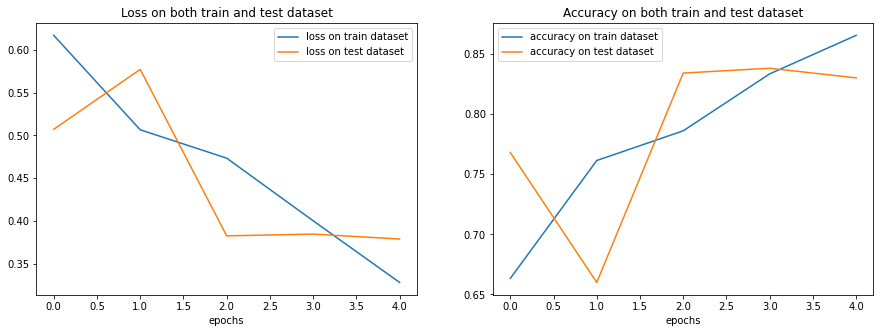

In [132]:
graph_to_visualize(history)

From above graph, we can see that our model is indeed overfiting that's its performing well on our trainning dataset but not performing well on our test dataset. Hence we will continue to improve our model by adding a **MaxPool2D** layer to our layers.

# Model_1
We are going to improve uporn our model by adding **MaxPool2D** in our layers.*italicised text*

In [133]:
# set random seed
tf.random.set_seed(42)

#Build our model
model_1 = tf.keras.Sequential([
                               
    # input layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224, 3),
                           activation="relu"),
     # 1st MaxPool layer
    tf.keras.layers.MaxPool2D(),

    # 1st hidden layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    
    # 2nd MaxPool layer
    tf.keras.layers.MaxPool2D(),

    #2nd hidden layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),

    #3rd MaxPool layer
    tf.keras.layers.MaxPool2D(),

    #3rd hidden layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),

    #4th MaxPool layer
    tf.keras.layers.MaxPool2D(),

    #flatten layer
    tf.keras.layers.Flatten(),

    #Output layer
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

#Lets compile our model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit our model
history_1 = model_1.fit(train_data,
                      epochs=5,
                      validation_data=test_data,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6637 - accuracy: 0.6177 - val_loss: 0.4934 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4942 - accuracy: 0.7923 - val_loss: 0.3651 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4268 - accuracy: 0.8019 - val_loss: 0.3591 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4176 - accuracy: 0.8092 - val_loss: 0.3159 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3740 - accuracy: 0.8421 - val_loss: 0.3092 - val_accuracy: 0.8860


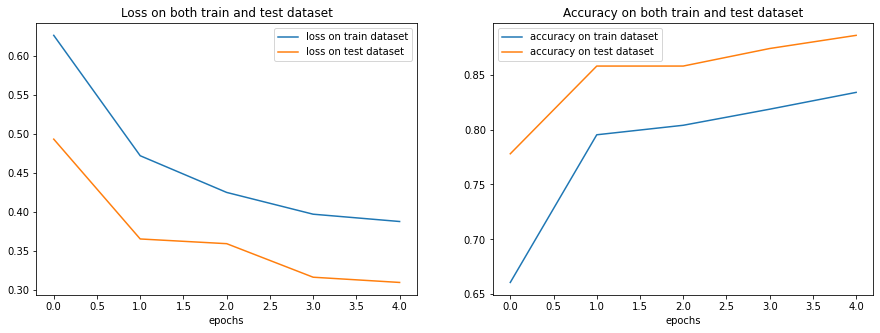

In [134]:
#Lets visualize our results with the function we created previosly
graph_to_visualize(history_1)

In [135]:
#Display 1st model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 216, 216, 10)      910       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 214, 214, 10)      910       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 212, 212, 10)      910       
_________________________________________________________________
flatten_6 (Flatten)          (None, 449440)          

In [136]:
#Display 2nd model summary
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 24, 24, 10)      

From the first model(model) we can see that the trainable parameters (the parameters the model used to find patterns during train) is **454, 271** and with the second model(model_1) the trainable parameters were **4,451**. Now lets evaluate both model and see the score of each model.

In [137]:
#Evaluation on 1st model
model.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.3790 - accuracy: 0.8300


[0.379019170999527, 0.8299999833106995]

In [138]:
#Evaluation on 2nd model
model_1.evaluate(test_data)

16/16 [==============================] - 2s 127ms/step - loss: 0.3092 - accuracy: 0.8860


[0.30921730399131775, 0.8859999775886536]

Now that we have been able to reduce our model from over fitting, we are still going to improve uporn our model again this time using just a minimum of 3 con2D layer and see our results.

## Model_2
Here we are going to reduce the total number of layers in our model

In [139]:
#Set random seed
tf.random.set_seed(42)

#Build model
model_2 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),

    #1st MaxPool layer
    tf.keras.layers.MaxPool2D(),

    #1st hidden layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    #2nd MaxPool layer
    tf.keras.layers.MaxPool2D(),

    #Flatten layer
    tf.keras.layers.Flatten(),

    #Output layer
    tf.keras.layers.Dense(units=1, activation="sigmoid")

])

#Compile our model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit our model
history_2 = model_2.fit(train_data, epochs=5,
            validation_data=test_data,
            steps_per_epoch=len(train_data),
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6575 - accuracy: 0.6057 - val_loss: 0.4275 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4385 - accuracy: 0.8140 - val_loss: 0.3718 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.3950 - accuracy: 0.8303 - val_loss: 0.3942 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3794 - accuracy: 0.8485 - val_loss: 0.3335 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3199 - accuracy: 0.8544 - val_loss: 0.3262 - val_accuracy: 0.8700


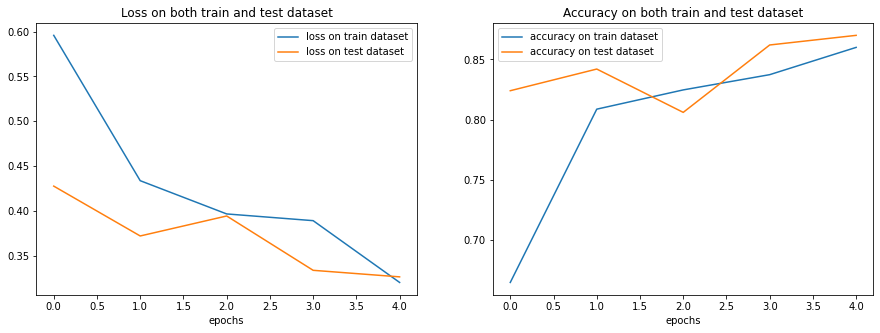

In [140]:
#Lets visualize our results
graph_to_visualize(history_2)

Waw now compared to our previos model, we can see that the train dataset is not overfitting any more based on our loss graph. We can see that as the train dataset decrease so as our test dataset during training hence we have been able to deal with over fitting on our model. Lets continue to evaluate our model.

In [141]:
#Evaluate our model
eval = model_2.evaluate(test_data)
print(f"Our error is {eval[0]}")
print(f"Our accuracy score is {eval[1]}")

16/16 [==============================] - 2s 127ms/step - loss: 0.3262 - accuracy: 0.8700
Our error is 0.3261720836162567
Our accuracy score is 0.8700000047683716


Now that we have hit our **Evaluation** from our introduction section, lets try our model on a custom dataset by browsing through the internet to search for pizza and steak images.



In [142]:
#Lets download some custom image from the provided urls and try it on our model

#Pizza images
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/pizza-recipes-hot-pepper-and-onion-pizza-1592320397.jpg
!wget https://assets.bonappetit.com/photos/5cd32ef32c3537178c3c8f03/6:9/w_1630,h_2445,c_limit/BA-Perfect-Pizza.jpg

#Steak images
!wget https://images.immediate.co.uk/production/volatile/sites/30/2020/08/steak-main-756c2b4.jpg
!wget https://media-cdn.tripadvisor.com/media/photo-s/12/e2/22/56/steiki.jpg

--2021-04-10 00:59:22--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/pizza-recipes-hot-pepper-and-onion-pizza-1592320397.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177739 (174K) [image/jpeg]
Saving to: ‘pizza-recipes-hot-pepper-and-onion-pizza-1592320397.jpg.1’

pizza-recipes-hot-p 100%[===================>] 173.57K  --.-KB/s    in 0.005s  

2021-04-10 00:59:22 (37.6 MB/s) - ‘pizza-recipes-hot-pepper-and-onion-pizza-1592320397.jpg.1’ saved [177739/177739]

--2021-04-10 00:59:22--  https://assets.bonappetit.com/photos/5cd32ef32c3537178c3c8f03/6:9/w_1630,h_2445,c_limit/BA-Perfect-Pizza.jpg
Resolving assets.bonappetit.com (assets.bonappetit.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to assets.bonappetit.com (assets.bonappetit.com)|151.1

We should remember that the downloaded custom image have a different shape from the one our model has. Hence we have to reshape it for it to have the same shape as the one our model have. Lets create a helper function to do that for us.

In [143]:
# A function to reshape and rescale our custom image for it to be like the one our model knows of.
def process_image(image_name, shape=224):
  #load image
  img = tf.io.read_file(image_name)

  #Decode the image into tensors
  img = tf.image.decode_image(img)

  #reshape our image
  img = tf.image.resize(img, size=[shape, shape])

  #rescale our images
  img = img/225

  return img

In [144]:
#Pizza images
pizza_1 = process_image("/content/pizza-recipes-hot-pepper-and-onion-pizza-1592320397.jpg")
pizza_2 = process_image("/content/BA-Perfect-Pizza.jpg")

#Steak images
steak_1 = process_image("/content/steak-main-756c2b4.jpg")
steak_2 = process_image("/content/steiki.jpg")

In [145]:
#Check their shapes
pizza_1.shape, pizza_2.shape, steak_1.shape, steak_2.shape,images.shape

(TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 (32, 224, 224, 3))

From the above, we can see that all our custom image have the same shape as our images that our model was trained on. **Note:** the 32 inside the images are the batch size and since our model have not pass through our model yet, it does not have one.Now, lets create a function to help us use our model.This function will tell us if our image is steak or pizza thats if our model was trained well.

In [157]:
def process_and_display_image(image_name, models, class_names):
  #call the process image function
  img = process_image(image_name)

  """
  make a prediction on our model
  """
  ypred = models.predict(tf.expand_dims(img, axis=0))

  if len(ypred[0]) > 1:
    class_pred = class_names[tf.argmax(ypred[0])]
  else:
    class_pred = class_names[int(tf.round(ypred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction is {class_pred}")
  plt.axis(False)

class_name = ['pizza','steak']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


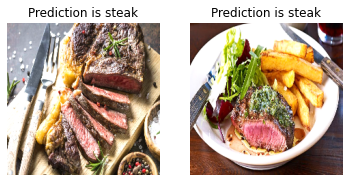

In [163]:
#Making our prediction on custom data now(Pizza)
#plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
process_and_display_image("/content/steak-main-756c2b4.jpg",model_2, class_name)

plt.subplot(1,2,1)
process_and_display_image("/content/freds_steak.jpg", model_2, class_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


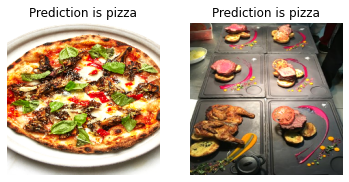

In [159]:
#Predicting if custom data is steak or pizza
#plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
process_and_display_image("/content/steiki.jpg",model_2, class_names=class_name)

plt.subplot(1,2,1)
process_and_display_image("/content/BA-Perfect-Pizza.jpg", model_2, class_names=class_name)

In [149]:
#Lets try againon a different custom image
!wget https://storage.googleapis.com/fpoo-public-bucket/img/Q320/freds_steak.jpg
!wget https://kamadojim.com/wp-content/uploads/2014/09/porterhouse-steak-reverse-sear1.jpg

--2021-04-10 00:59:24--  https://storage.googleapis.com/fpoo-public-bucket/img/Q320/freds_steak.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148232 (145K) [image/jpeg]
Saving to: ‘freds_steak.jpg.2’

freds_steak.jpg.2   100%[===================>] 144.76K  --.-KB/s    in 0.001s  

2021-04-10 00:59:24 (144 MB/s) - ‘freds_steak.jpg.2’ saved [148232/148232]

--2021-04-10 00:59:24--  https://kamadojim.com/wp-content/uploads/2014/09/porterhouse-steak-reverse-sear1.jpg
Resolving kamadojim.com (kamadojim.com)... 104.196.151.207
Connecting to kamadojim.com (kamadojim.com)|104.196.151.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73738 (72K) [image/jpeg]
Saving to: ‘porterhouse-steak-reverse-sear1.jpg.1’

porterhouse-steak-r 100%[================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


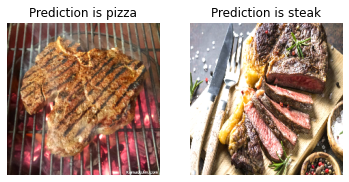

In [164]:
#Predicting if custom data is steak or pizza
plt.subplot(1,2,2)
process_and_display_image("/content/freds_steak.jpg",model_2, class_names=class_name)

plt.subplot(1,2,1)
process_and_display_image("/content/porterhouse-steak-reverse-sear1.jpg", model_2, class_names=class_name)

Well well well, our model is not performing well on our custom images. Why because it seems that our model is still overfitting on our trained and test datasets. Hence we will still continue to train our model to get an accuracy score of 90% and above and re test it on our custom images.